<a href="https://colab.research.google.com/github/aravinddddddd/Customer-Churn-Prediction-Project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/Telco_customer_churn.xlsx")
print(df.head())
print(df.describe())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        display(df[col].value_counts())

,count
CustomerID,
3186-AJIEK,1
3668-QPYBK,1
9237-HQITU,1
7203-OYKCT,1
9837-FWLCH,1
...,...
1066-JKSGK,1
8779-QRDMV,1
4190-MFLUW,1


,count
Country,
United States,7043


,count
State,
California,7043


,count
City,
Los Angeles,305
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
...,...
Chester,4
Big Bar,4
Washington,4


,count
Lat Long,
"34.159534, -116.425984",5
"33.28156, -115.955541",5
"34.201108, -116.593456",5
"33.798266, -118.300237",5
"33.391181, -118.421305",5
...,...
"41.505916, -120.152505",4
"41.764869, -122.671316",4
"41.465121, -122.380947",4


,count
Gender,
Male,3555
Female,3488


,count
Senior Citizen,
No,5901
Yes,1142


,count
Partner,
No,3641
Yes,3402


,count
Dependents,
No,5416
Yes,1627


,count
Phone Service,
Yes,6361
No,682


,count
Multiple Lines,
No,3390
Yes,2971
No phone service,682


,count
Internet Service,
Fiber optic,3096
DSL,2421
No,1526


,count
Online Security,
No,3498
Yes,2019
No internet service,1526


,count
Online Backup,
No,3088
Yes,2429
No internet service,1526


,count
Device Protection,
No,3095
Yes,2422
No internet service,1526


,count
Tech Support,
No,3473
Yes,2044
No internet service,1526


,count
Streaming TV,
No,2810
Yes,2707
No internet service,1526


,count
Streaming Movies,
No,2785
Yes,2732
No internet service,1526


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


,count
Paperless Billing,
Yes,4171
No,2872


,count
Payment Method,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


,count
Total Charges,
20.2,11
,11
19.75,9
20.05,8
19.65,8
...,...
394.1,1
7589.8,1
905.55,1


,count
Churn Label,
No,5174
Yes,1869


,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


In [6]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [8]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

In [9]:
df['Average Monthly Charge'] = df['Total Charges'] / df['Tenure Months']
df['Average Monthly Charge'].replace([float('inf'), -float('inf')], 0, inplace=True) # Handle division by zero
df['Average Monthly Charge'].fillna(0, inplace=True)

/tmp/ipython-input-3954126794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Monthly Charge'].replace([float('inf'), -float('inf')], 0, inplace=True) # Handle division by zero
/tmp/ipython-input-3954126794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [10]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason', 'Churn Label'], axis=1, inplace=True)

In [11]:
# Convert binary categorical columns to numeric
for col in ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

In [12]:
df = pd.get_dummies(df, columns=[col for col in df.select_dtypes(include='object').columns if col not in ['Churn Value']], drop_first=True)

In [13]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
...,...
Contract_One year,0
Contract_Two year,0
Payment Method_Credit card (automatic),0
Payment Method_Electronic check,0


In [14]:
print("\nData types:")
display(df.dtypes)


Data types:


,0
Gender,int64
Senior Citizen,int64
Partner,int64
Dependents,int64
Tenure Months,int64
...,...
Contract_One year,bool
Contract_Two year,bool
Payment Method_Credit card (automatic),bool
Payment Method_Electronic check,bool


In [15]:
print("\nDescriptive statistics for numerical columns:")
display(df.describe())


Descriptive statistics for numerical columns:


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Average Monthly Charge
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.231010,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370,58.699418,4400.295755,64.698218
std,0.500013,0.368612,0.499748,0.421508,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561,21.525131,1183.057152,30.270670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,40.000000,3469.000000,35.649000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000,70.300000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000,90.174158
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000,121.400000


In [17]:
print("\nValue counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column '{col}':")
    display(df[col].value_counts())


Value counts for categorical columns:


In [19]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.3).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.9063
Precision: 0.7811
Recall: 0.9299
F1 Score: 0.8490

Confusion Matrix:


array([[1132,  130],
       [  35,  464]])

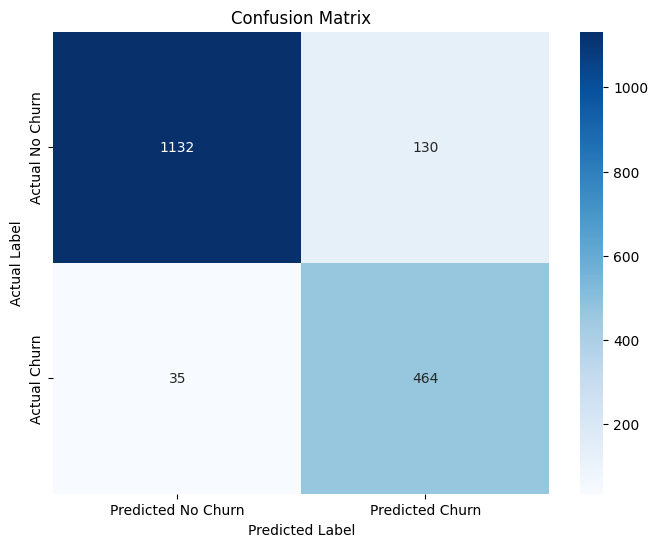

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming conf_matrix is already calculated from the previous step
# If not, uncomment the following lines to calculate it again
# from sklearn.metrics import confusion_matrix
# y_pred_proba = model.predict_proba(X_test)[:, 1]
# y_pred = (y_pred_proba >= 0.3).astype(int)
# conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into features (X) and the target variable (y), 'Churn Value'.
*   The data was divided into training (75%) and testing (25%) sets using train_test_split with random_state=42.
*   Numerical features in both the training and testing sets were scaled using 'StandardScaler'.
*   A Logistic Regression model was trained on the scaled training data.
*   The trained Logistic Regression model's performance on the testing set was evaluated with the following metrics:
    -  Accuracy: 0.9097
    -  Precision: 0.8346
    -   Recall: 0.8497
    -  F1 Score: 0.8421
